<a href="https://colab.research.google.com/github/rohahnbiswas-works/Dog-Vision/blob/main/Code/DogVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#identifying the breed of a dog given the image of an dog.
#the data is used from Kaggle Dog breed identification competition
#the evaluation is a file with prediction probabs for each dog breed
#we are dealing with unstructured data with images
# we are using deep andtransfer learning.

In [ ]:
#importing tensorflow into colab
import tensorflow as tf
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#getting our data ready and turning it into tensors(numerical representations)
#Checkout the labels of our data
labels_csv= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head

<bound method NDFrame.head of                                      id                     breed
0      000bec180eb18c7604dcecc8fe0dba07               boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97                     dingo
2      001cdf01b096e06d78e9e5112d419397                  pekinese
3      00214f311d5d2247d5dfe4fe24b2303d                  bluetick
4      0021f9ceb3235effd7fcde7f7538ed62          golden_retriever
...                                 ...                       ...
10217  ffd25009d635cfd16e793503ac5edef0                    borzoi
10218  ffd3f636f7f379c51ba3648a9ff8254f            dandie_dinmont
10219  ffe2ca6c940cddfee68fa3cc6c63213f                  airedale
10220  ffe5f6d8e2bff356e9482a80a6e29aac        miniature_pinscher
10221  fff43b07992508bc822f33d8ffd902ae  chesapeake_bay_retriever

[10222 rows x 2 columns]>

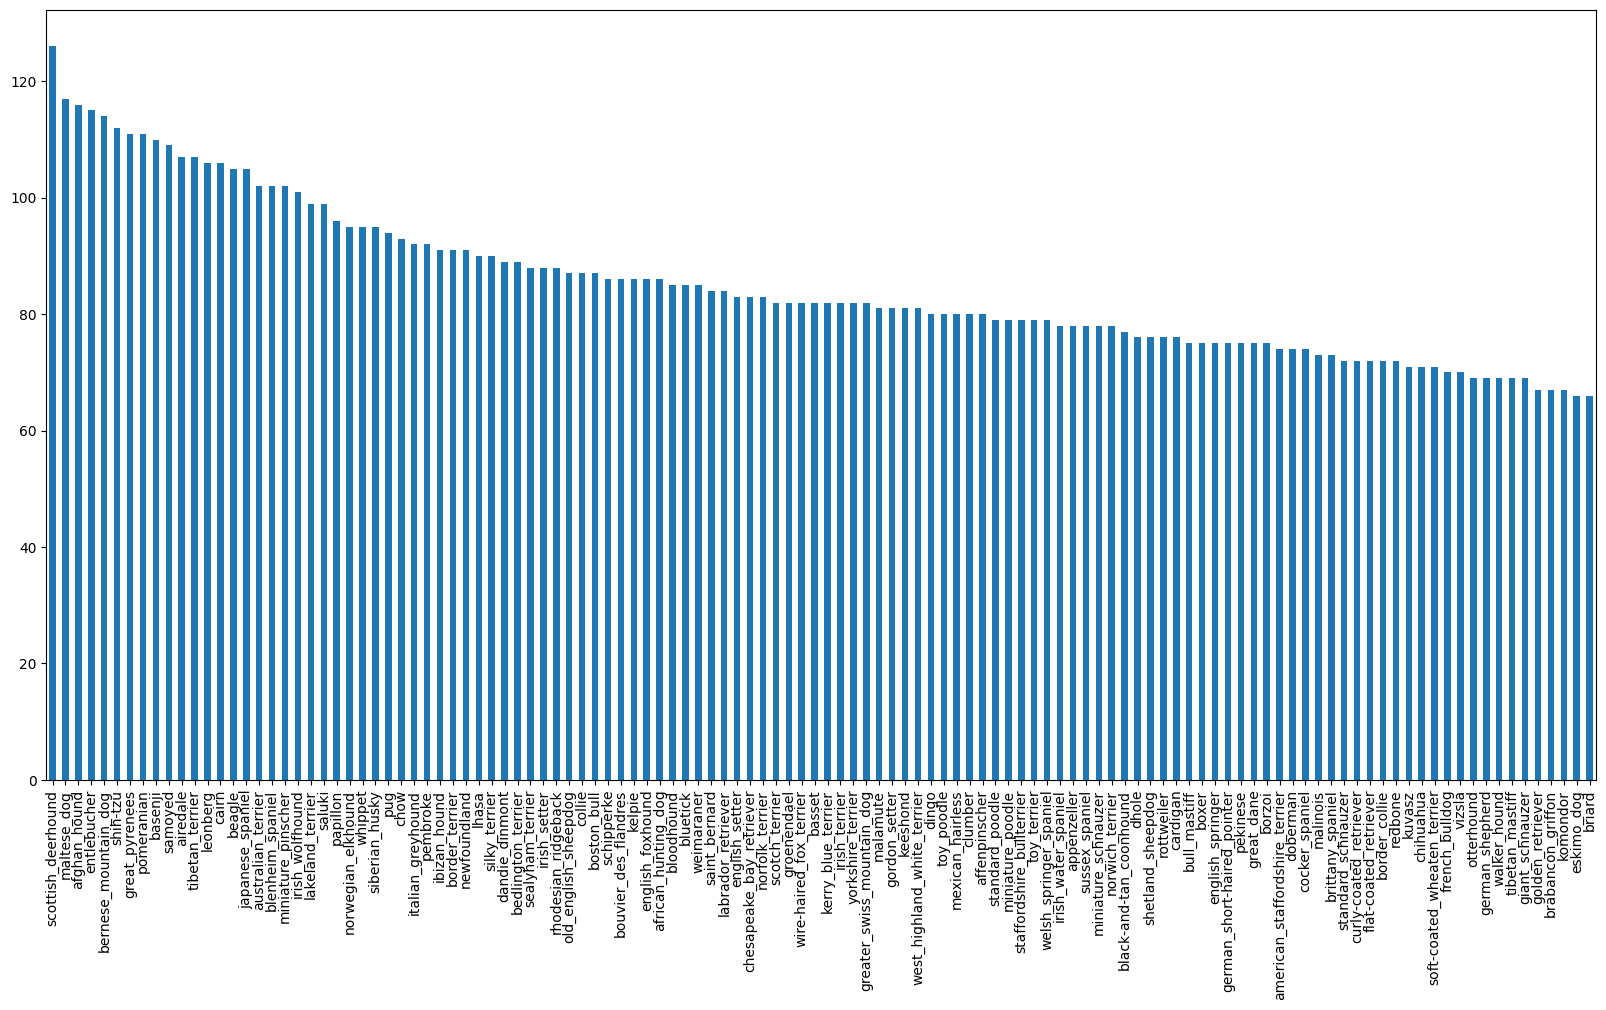

In [ ]:
#How many images of each breed
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10));

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

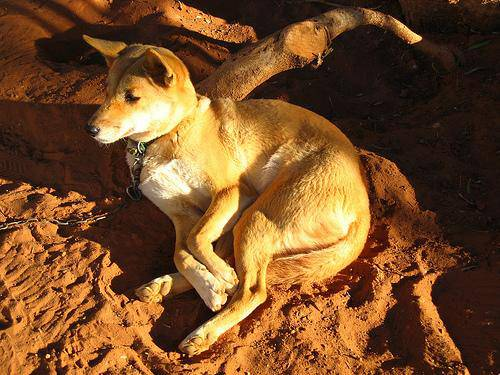

In [ ]:
from IPython.display import Image
Image("//content/drive/MyDrive/Colab Notebooks/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [ ]:
#getting a list of all of our pathnames
filenames= ["/content/drive/MyDrive/Colab Notebooks/train/"+ fname + ".jpg" for fname in labels_csv["id"]]
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#check whether number of filenames matched numer of actual image files
import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/train"))==len(filenames):
  print("hello")
else:
  print("Bye")


hello


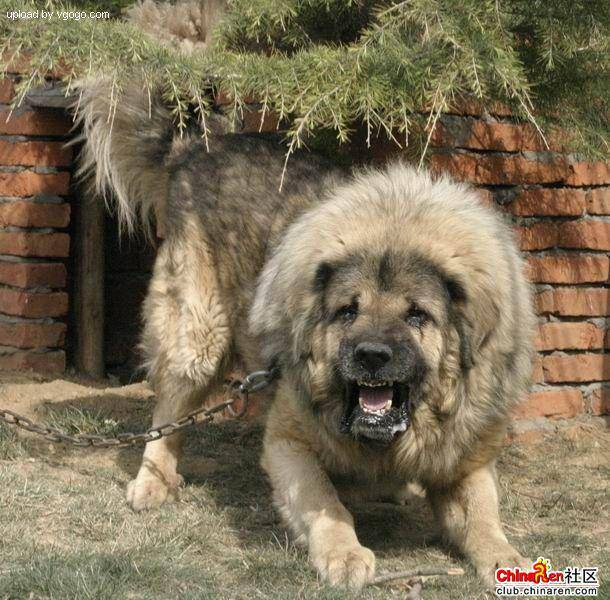

In [ ]:
#one more check
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
#lets prepare our labels
labels= labels_csv["breed"]
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
if len(labels) == len(filenames):
  print("Hello")
else:
  print("Bye")

Hello


In [ ]:
#FInd unique labels values
unique_breeds= np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
print(labels[0])
labels[0]== unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#turn every label into a boolean array
boolean_labels= [label== unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
#Example turning boolean arrays into integears
print(labels[0])
print(np.where(unique_breeds==labels[0])) #index where lable occurs
print(boolean_labels[0].argmax()) #index where labels occur in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample lable occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/Colab Notebooks/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
#Create our own validation set
#setup x and y variables
X= filenames
y= boolean_labels

In [ ]:
len(filenames)

10222

In [ ]:
# we are going to start with experimenting with 1000 images and increase it gradually
NUM_IMAGES= 1000 #@param {type:"slider", min:1000, max:10000}

In [ ]:
#Lets slpit our data into train and validation sets
from sklearn.model_selection import train_test_split

#Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val= train_test_split(X[:NUM_IMAGES],
                                                 y[:NUM_IMAGES],
                                                 test_size=0.2,
                                                 random_state=42)
len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
#Lets have a geez at training data
X_train[:5], y_train[:2]

(['/content/drive/MyDrive/Colab Notebooks/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/Colab Notebooks/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/Colab Notebooks/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/Colab Notebooks/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/Colab Notebooks/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fa

In [ ]:
#Preprocessing images(turning images into tensors)
#Convert image to Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[232])
image.shape

(420, 367, 3)

In [ ]:
image.max(), image.min()

(255, 0)

array([[[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [252, 250, 253],
        [252, 250, 253],
        [252, 250, 253]],

       [[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [254, 252, 255],
        [254, 252, 255],
        [254, 252, 255]],

       [[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [255, 254, 255],
        [255, 254, 255],
        [255, 254, 255]],

       ...,

       [[166, 129,  76],
        [176, 141,  87],
        [179, 148,  91],
        ...,
        [ 36,  15,  22],
        [ 38,  17,  24],
        [ 38,  15,  21]],

       [[164, 127,  74],
        [173, 138,  84],
        [176, 145,  88],
        ...,
        [ 33,  12,  19],
        [ 35,  14,  21],
        [ 35,  12,  18]],

       [[166, 129,  76],
        [175, 140,  86],
        [179, 148,  91],
        ...,
        [ 35,  14,  21],
        [ 37,  16,  23],
        [ 37,  14,  20]]], dtype=uint8)
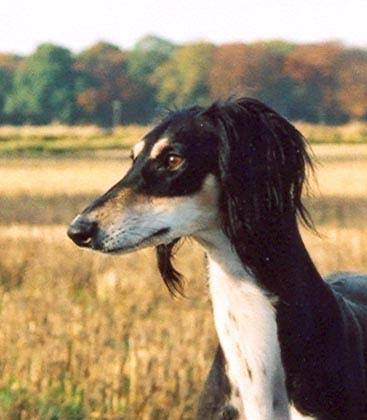

In [ ]:
image

In [ ]:
#turn image into a tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 367, 3), dtype=uint8, numpy=
array([[[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [252, 250, 253],
        [252, 250, 253],
        [252, 250, 253]],

       [[255, 253, 255],
        [255, 253, 255],
        [255, 253, 255],
        ...,
        [254, 252, 255],
        [254, 252, 255],
        [254, 252, 255]]], dtype=uint8)>

In [ ]:
# preprocessing images
IMG_SIZE= 224
# function for preprocessing
def process_image(image_path):
  image=tf.io.read_file(image_path) #reading path
  #turn jpeg into numerical tensor
  image= tf.image.decode_jpeg(image, channels=3)
  #convert the color channel values from 0-225 to 0-1
  image= tf.image.convert_image_dtype(image, tf.float32)
  #resize the image to (224,224)
  image= tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

In [ ]:
#turning our data into batches

#creating a function to return a tuple for tensorflow
def get_image_label(image_path, label):
  image= process_image(image_path)
  return image, label



In [ ]:
(process_image(X[42]) ,tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
# define the batch size, let 32
BATCH_SIZE = 32

#create a function to turn batches into data
def create_data_batches(X, y=None, batch_size= BATCH_SIZE, valid_data= False, test_data= False):
  #Create batches of data out of image(X) and lebel(y) pairs
  #Shuffles the data if its training set but not if its a val data
  #also accepts test data as input (no labels)
  #if tdata is test dataset, we probably dont have labels
  if test_data:
   print("Hello")
   data= tf.data.Dataset.from_tensor_slices((tf.constant(X)))
   data_batch= data.map(process_image).batch(BATCH_SIZE)
   return data_batch

#if the data is valid dataset, we dont need to shuffle it
  elif valid_data:
   print("Helllooo")
   data= tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y)))# filenames anf labels
   data_batch= data.map(get_image_label).batch(BATCH_SIZE)
   return data_batch
  else:
   print("Byee")
   #turn filepaths and labels into tensors
   data=  tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))
   #Shuffling pathnames and labels before mapping image processor function is faster than shuffle
   data= data.shuffle(buffer_size= len(X))

   data= data.map(get_image_label)
   #turn the training data into batches
   data_batch= data.batch(BATCH_SIZE)
  return data_batch

In [ ]:
#create training and validation data batches
train_data= create_data_batches(X_train, y_train)
val_data= create_data_batches(X_val, y_val, valid_data=True)

Byee
Helllooo


In [ ]:
#check out different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
#visualizing our data batches
# create a function for viewing images in a data batch
def show_25_images(images,labels):
  #setup the figure
  plt.figure(figsize=(10,10))
  #loop through 25 images
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    #Display an imagee
    plt.imshow(images[i])
    # add the image label as titile
    plt.title(unique_breeds[labels[i].argmax()])
    #turn the grid lines off
    plt.axis("off")


In [ ]:
train_images, train_labels= next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.06138784, 0.04962313, 0.03001529],
          [0.0606341 , 0.0488694 , 0.02926155],
          [0.07975667, 0.06799196, 0.04838412],
          ...,
          [0.23647186, 0.27917376, 0.24224274],
          [0.20260645, 0.14381911, 0.1423661 ],
          [0.17000107, 0.08901367, 0.09421325]],
 
         [[0.07646254, 0.06469783, 0.04508999],
          [0.05156899, 0.03980428, 0.02019644],
          [0.07928219, 0.06751748, 0.04790964],
          ...,
          [0.12602572, 0.19813703, 0.15067554],
          [0.19334078, 0.18562238, 0.16706713],
          [0.181363  , 0.15041797, 0.13850516]],
 
         [[0.06127686, 0.04951215, 0.02990431],
          [0.06360123, 0.05183652, 0.03222867],
          [0.07541423, 0.06364952, 0.04404168],
          ...,
          [0.1024217 , 0.2161792 , 0.15558748],
          [0.19731095, 0.2469747 , 0.20813546],
          [0.1883852 , 0.22384688, 0.18909429]],
 
         ...,
 
         [[0.7312172 , 0.7469035 , 0.78219765],
          [0.74595

In [ ]:
len(train_images),len(train_labels)

(32, 32)

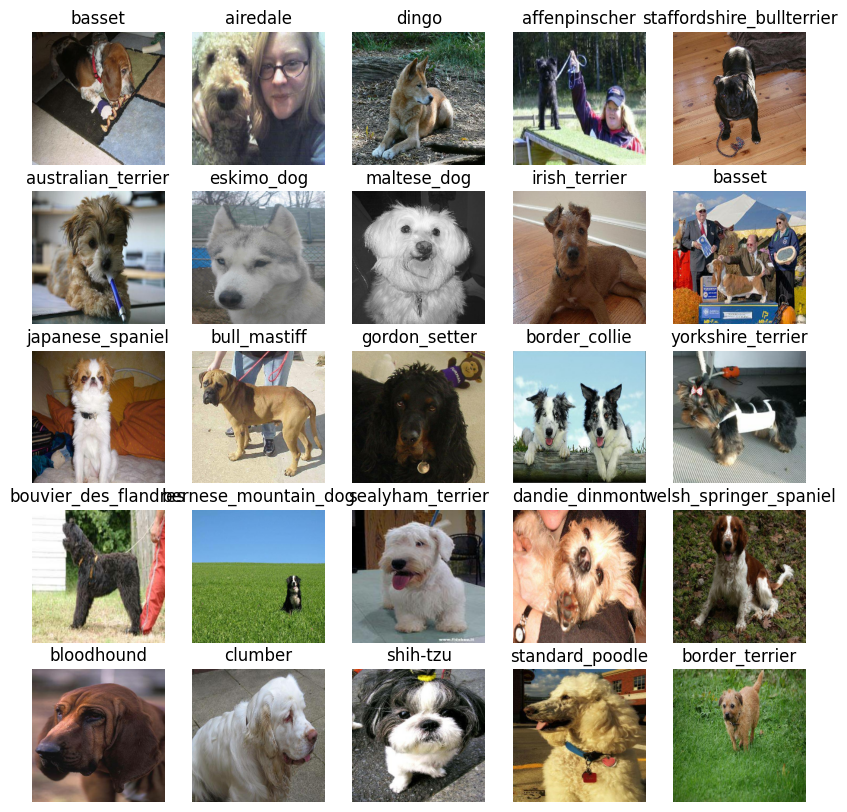

In [ ]:
#Now lets visualize the fata
show_25_images(train_images, train_labels)

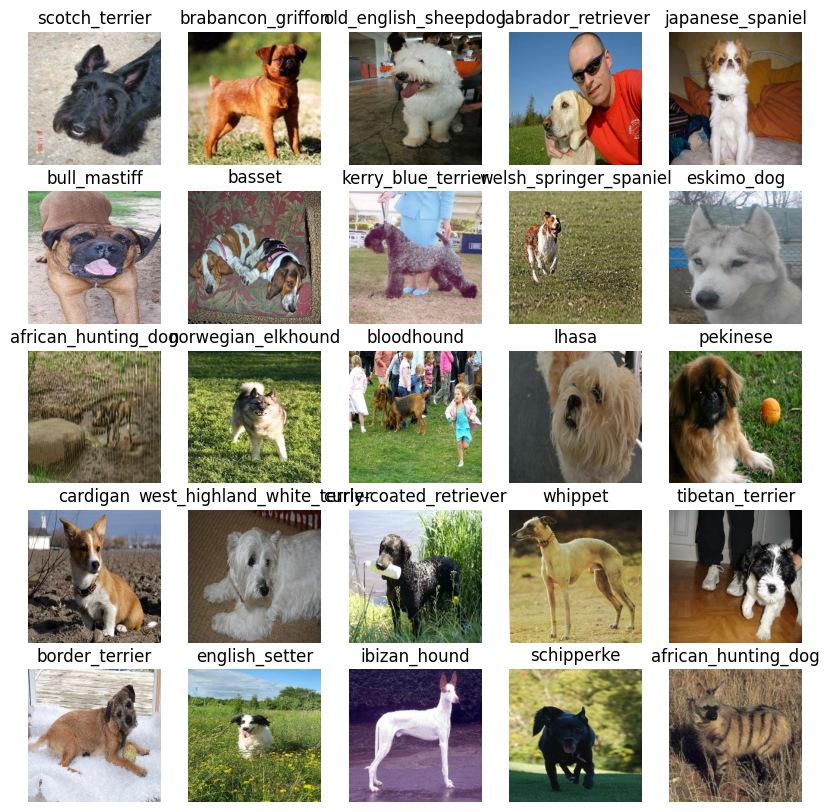

In [ ]:
#now lets visualize our val set
val_images, val_labels= next(train_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

In [ ]:
#building a model
#before we build a model, we need to define
#input shape(image shape in shape of tensors)
#output shape(image labels in shape of tensors)
#the url we want to use


In [ ]:
#setup input shape to the model
INPUT_SHAPE= [None, IMG_SIZE, IMG_SIZE, 3]# batch, height, width, color channels
#setup output shape of our model
OUTPUT_SHAPE= len(unique_breeds)

#setup URL from tensorflow hub
MODEL_URL= "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [ ]:
INPUT_SHAPE, OUTPUT_SHAPE

([None, 224, 224, 3], 120)

In [ ]:
import tensorflow_hub as hub
from tensorflow import keras
#lets put everything together in our Keras deep learning model
#create a function which builds a Keras model
def create_model(input_shape= INPUT_SHAPE, output_shape= OUTPUT_SHAPE, model_url= MODEL_URL):
  print("Hello")

  #Setup the model layers
  model= tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),#layer 1 (input layer)
      tf.keras.layers.Dense(units= OUTPUT_SHAPE,
                            activation="softmax") #layer 2 (output layer)
  ])

  #cmpile the model
  model.compile(
      loss= tf.keras.losses.CategoricalCrossentropy(),
      optimizer= tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  #Build the model
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model= create_model()
model.summary()

Hello
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


In [ ]:
#creating callbacks(helper functions to do such things such as save process or stop the process if the model rstops improving)

In [ ]:
#tensorboard callback
%load_ext tensorboard

import datetime
#create a func to build a TensorBoard Callback
def create_tensorboard_callback():
  #create a log directory fprp storing tensorboard logs
  logdir= os.path.join("/content/drive/MyDrive/Colab Notebooks/Logs",
                       datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
#preventing overfitting (early stopping callback)
early_stopping= tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                 patience=2)

In [ ]:
#training a model (on subset of data)
#first model will be trained on only 1000 images
NUM_EPOCHS= 10 #@param {type:"slider", min:10,max:100,step:10}

In [ ]:
#lets create a function which trains a model and return it
def train_model():
  model= create_model()

  #create new tensorboard session everytime we train a model
  tensorboard= create_tensorboard_callback()

  #Fit the model to use the data passing it the callbacks we created
  model.fit(x =train_data,
            epochs= NUM_EPOCHS,
            validation_data= val_data,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  return model


In [ ]:
model = train_model()

Hello
Epoch 1/10
25/25 [==============================] - 284s 10s/step - loss: 4.5238 - accuracy: 0.1025 - val_loss: 3.4145 - val_accuracy: 0.2950
Epoch 2/10
25/25 [==============================] - 68s 3s/step - loss: 1.6131 - accuracy: 0.6862 - val_loss: 2.1854 - val_accuracy: 0.4950
Epoch 3/10
25/25 [==============================] - 67s 3s/step - loss: 0.5596 - accuracy: 0.9425 - val_loss: 1.6407 - val_accuracy: 0.5850
Epoch 4/10
25/25 [==============================] - 61s 2s/step - loss: 0.2471 - accuracy: 0.9900 - val_loss: 1.4695 - val_accuracy: 0.6250
Epoch 5/10
25/25 [==============================] - 70s 3s/step - loss: 0.1451 - accuracy: 0.9962 - val_loss: 1.3850 - val_accuracy: 0.6400
Epoch 6/10
25/25 [==============================] - 69s 3s/step - loss: 0.1010 - accuracy: 0.9987 - val_loss: 1.3408 - val_accuracy: 0.6250
Epoch 7/10
25/25 [==============================] - 67s 3s/step - loss: 0.0746 - accuracy: 0.9987 - val_loss: 1.3090 - val_accuracy: 0.6350
Epoch 8/10
2

In [ ]:
#Overfitting to begin with is good but not good for the model

#checking the tensorboard logs
%tensorboard --logdir /content/drive/MyDrive/Colab Notebooks/Logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2024-02-20 10:42:37.771349: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-20 10:42:37.771469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-20 10:42:37.775824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-20 10:42:39.719963: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--load_f

In [ ]:
#making predictions on the validation set(not the model it is trained on)
prediction= model.predict(val_data, verbose=1)
prediction

7/7 [==============================] - 18s 2s/step


array([[1.4397821e-03, 7.6253462e-04, 4.9175776e-04, ..., 1.1279761e-03,
        1.7832806e-04, 1.0361007e-02],
       [4.0613729e-04, 1.3002721e-04, 3.0295339e-03, ..., 9.3420211e-05,
        6.3167169e-04, 9.6781114e-05],
       [3.2595250e-05, 1.1641663e-05, 1.8750947e-05, ..., 3.1861430e-04,
        2.6139256e-04, 2.8598777e-04],
       ...,
       [7.5900730e-06, 1.5809885e-05, 1.8333860e-05, ..., 9.0987032e-06,
        4.7097714e-05, 9.5996938e-06],
       [5.3304560e-03, 4.3005118e-04, 9.4648225e-05, ..., 8.8926325e-05,
        1.4699750e-04, 7.7540772e-03],
       [7.4990420e-04, 8.8261426e-05, 1.0460294e-03, ..., 1.6734233e-02,
        7.4494845e-04, 4.1116287e-05]], dtype=float32)

In [ ]:
prediction[0]

array([1.43978209e-03, 7.62534619e-04, 4.91757761e-04, 5.39312823e-05,
       3.23890854e-04, 2.73933583e-05, 2.71051861e-02, 4.13779635e-04,
       2.85217568e-04, 9.32132069e-04, 1.07367267e-03, 6.84999541e-05,
       7.48758495e-04, 1.93690168e-04, 5.53657941e-04, 1.82576501e-03,
       1.78911825e-04, 1.80158138e-01, 9.19555823e-05, 4.62144999e-05,
       1.87932129e-03, 6.57488534e-04, 8.49006974e-05, 1.89961900e-03,
       5.39780049e-05, 1.59581963e-04, 1.05130225e-01, 4.68651124e-05,
       1.57282001e-03, 7.94551568e-04, 4.70092491e-04, 3.38709494e-03,
       2.35032800e-04, 1.37302835e-04, 1.89457485e-03, 6.02769740e-02,
       2.51602090e-04, 5.43382310e-04, 6.85573686e-05, 2.38124427e-04,
       2.69928249e-03, 1.19378619e-05, 2.38396722e-04, 3.67207598e-04,
       3.91160611e-05, 2.91464967e-04, 2.67472729e-04, 2.61016452e-04,
       8.30397417e-04, 1.20908160e-04, 5.88670664e-04, 3.96892938e-05,
       4.29063570e-04, 2.35889365e-05, 2.45951233e-04, 1.36150236e-04,
      

In [ ]:
np.sum(prediction[0])

1.0

In [ ]:
#first prediction
index=1
print(prediction[0])
print(f"Max value of prob of prediction:{np.max(prediction[index])}")
print(f"sum :{np.sum(prediction[index])}")
print(f"Max Index:{np.argmax(prediction[index])}")
print(f"Predicted label :{unique_breeds[np.argmax(prediction[index])]}")

[1.43978209e-03 7.62534619e-04 4.91757761e-04 5.39312823e-05
 3.23890854e-04 2.73933583e-05 2.71051861e-02 4.13779635e-04
 2.85217568e-04 9.32132069e-04 1.07367267e-03 6.84999541e-05
 7.48758495e-04 1.93690168e-04 5.53657941e-04 1.82576501e-03
 1.78911825e-04 1.80158138e-01 9.19555823e-05 4.62144999e-05
 1.87932129e-03 6.57488534e-04 8.49006974e-05 1.89961900e-03
 5.39780049e-05 1.59581963e-04 1.05130225e-01 4.68651124e-05
 1.57282001e-03 7.94551568e-04 4.70092491e-04 3.38709494e-03
 2.35032800e-04 1.37302835e-04 1.89457485e-03 6.02769740e-02
 2.51602090e-04 5.43382310e-04 6.85573686e-05 2.38124427e-04
 2.69928249e-03 1.19378619e-05 2.38396722e-04 3.67207598e-04
 3.91160611e-05 2.91464967e-04 2.67472729e-04 2.61016452e-04
 8.30397417e-04 1.20908160e-04 5.88670664e-04 3.96892938e-05
 4.29063570e-04 2.35889365e-05 2.45951233e-04 1.36150236e-04
 4.49779996e-04 2.18406483e-03 1.89010915e-03 3.41185071e-02
 1.62721131e-04 6.78647411e-05 1.20998258e-02 2.57922020e-05
 6.78961677e-03 5.339578

In [ ]:
#making the above process better
#prediction probs are also called confidence labels
#turning probs into their resp labels(easier to understand)
def get_pred_label(prediction_probabilties):
  return unique_breeds[np.argmax(prediction_probabilties)]
  #get a predicted label based on array of prediction probabilites
  pred_label= get_pred_label(predictions[81])
  pred_label

In [ ]:
def unbatchify(data):
  images=[]
  labels=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  return images, labels
val_images, val_labels= unbatchify(val_data)
val_images[0], val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
#create a function to unbatch our batched dataset
images_=[]
labels_=[]
#loop through unbatched data
for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)
images_[0], labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
#making the predictions visual
def plot_pred(prediction_probabilties, labels, images, n=1):
  pred_prob, true_label, image= prediction_probabilties[n], labels[n], images[n]


  #get the pred label
  pred_label= get_pred_label(pred_prob)

  #plot the image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  #change plot title to be predicted, prob of pred and truth label
  plt.title("{}{:2.0f}% {}".format(pred_label,
                                   np.max(pred_prob)*100,
                                   true_label))

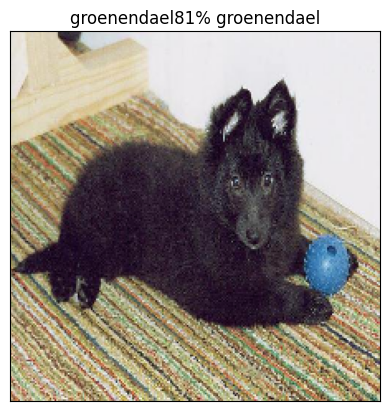

In [ ]:
plot_pred(prediction_probabilties=prediction,
          labels=val_labels,
          images=val_images,
          n=77)

In [ ]:
#func to visualize top ten predictions
def plot_pred_conf(prediction_probablities, labels, n=1):
  pred_prob, true_label= prediction_probablities[n], labels[n]
  #get the predicted label
  pred_label= get_pred_label(pred_prob)
  #find the top 10 prediction confidence indexes
  top_10_pred_indexes= pred_prob.argsort()[-10:][::-1]
  #find the top 10 prediction confidence values
  top_10_pred_values= pred_prob[top_10_pred_indexes]
  #find the top 10 prediction labels
  top_10_pred_labels= unique_breeds[top_10_pred_indexes]
  #Setup plot
  top_plot= plt.bar(np.arange(len(top_10_pred_labels)),
                    top_10_pred_values,
                    color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels= top_10_pred_labels,
             rotation="vertical")
  #change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels== true_label)].set_color("green")
  else:
    pass




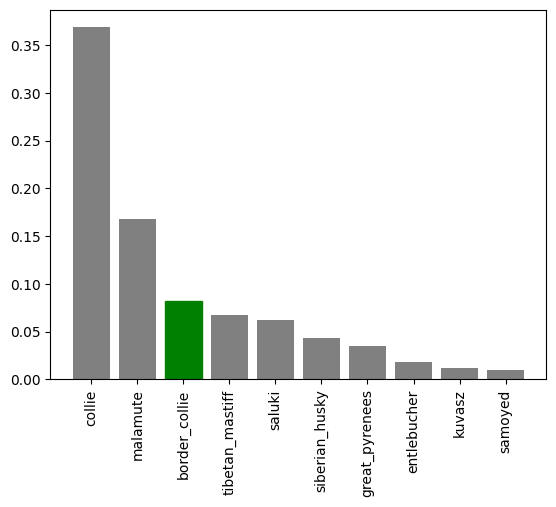

In [ ]:
plot_pred_conf(prediction_probablities=prediction,
               labels=val_labels,
               n=9)

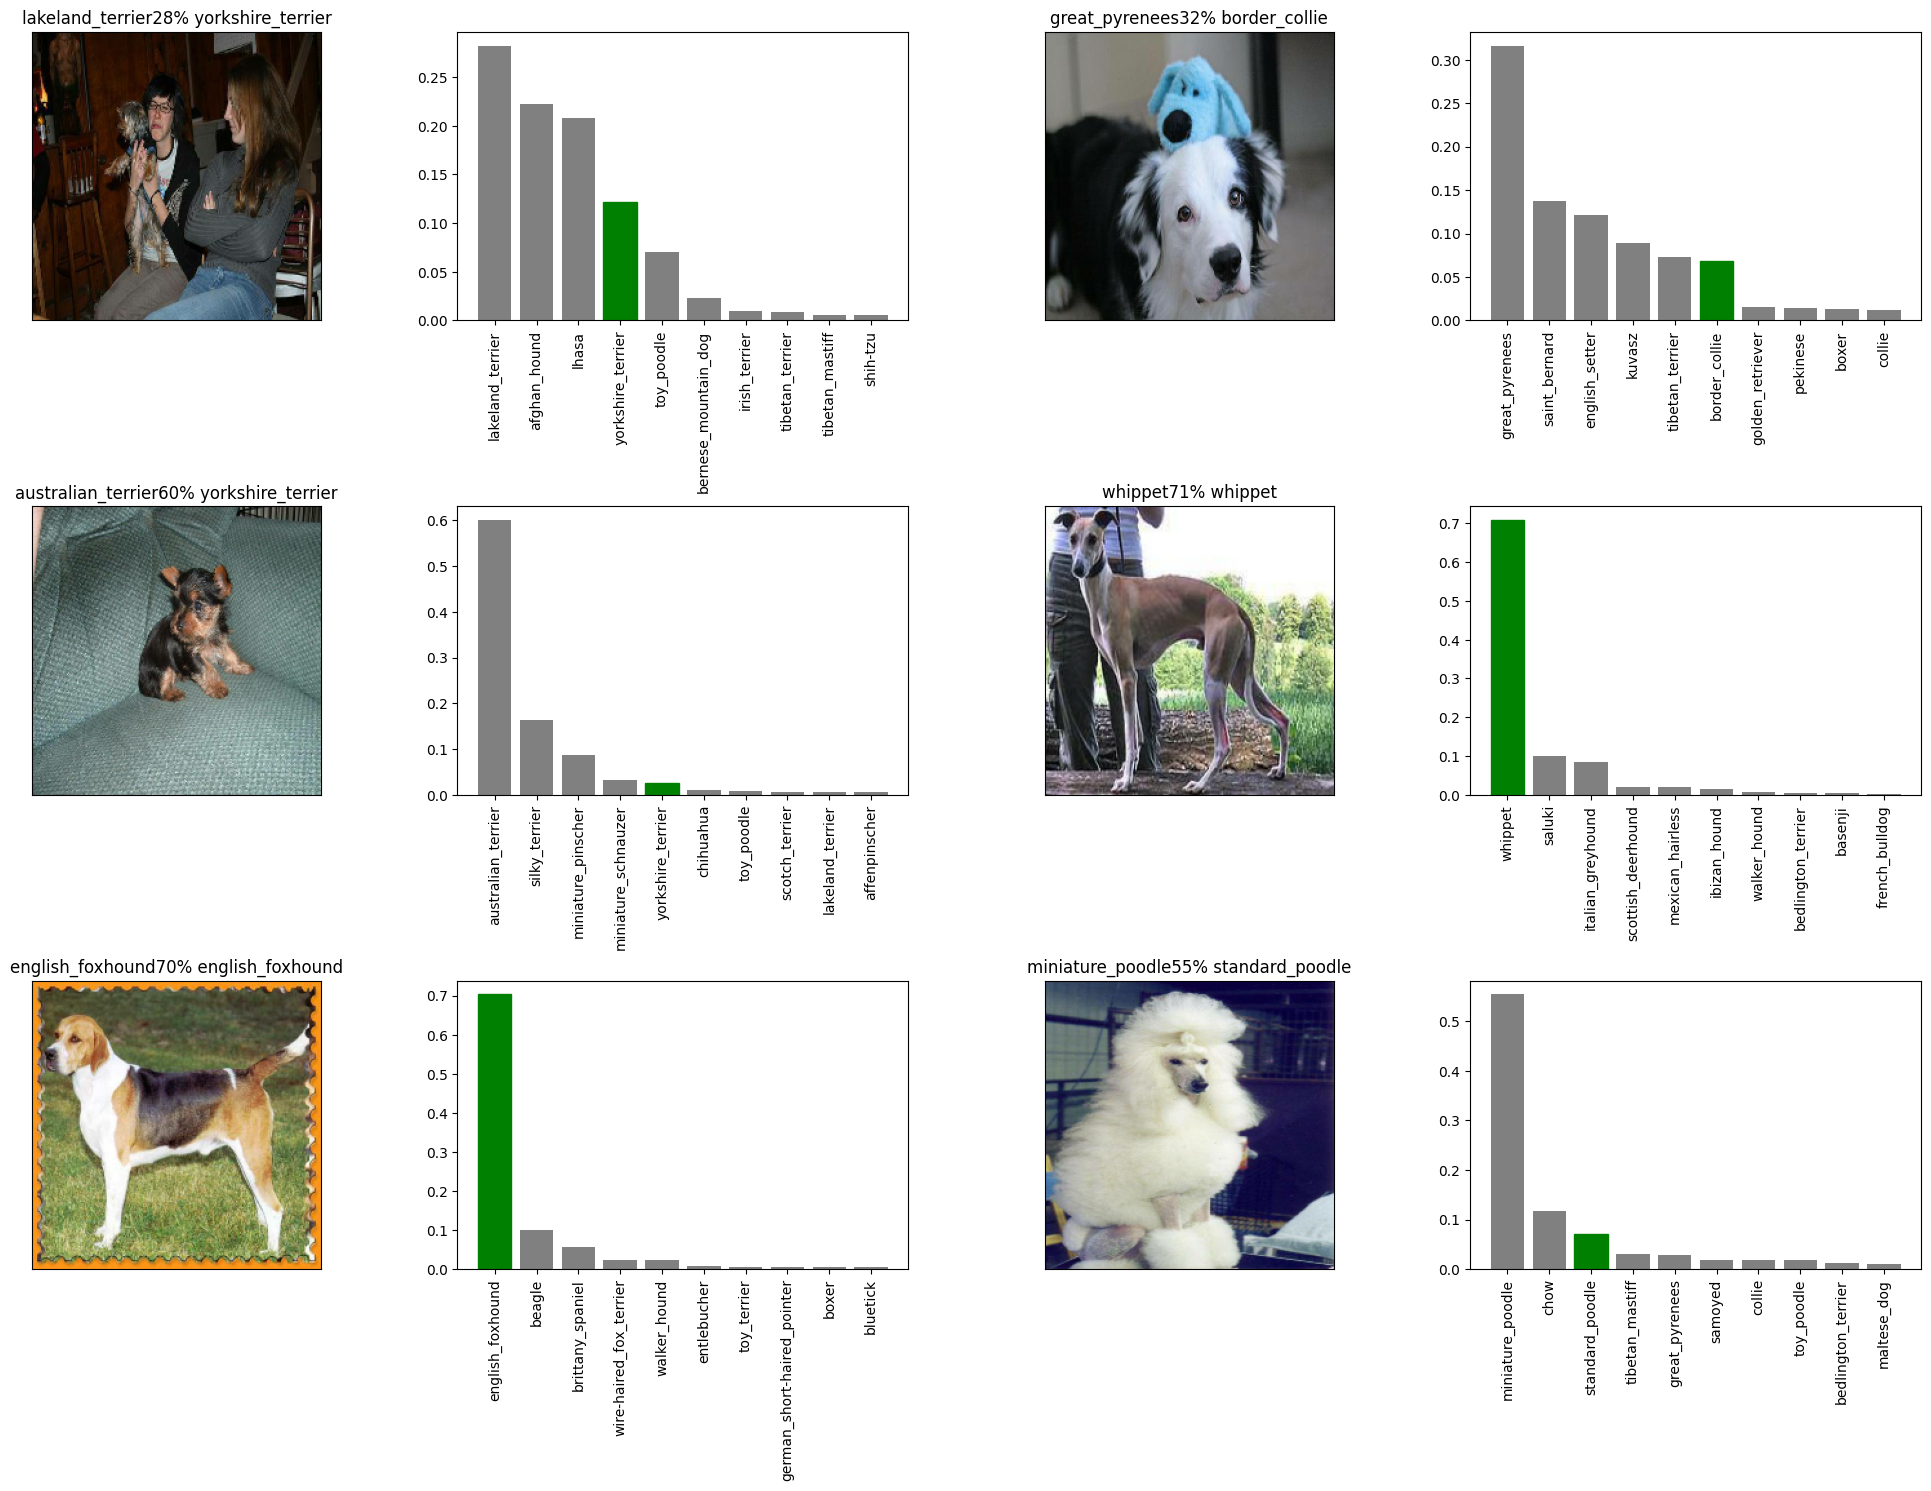

In [ ]:
#checking out a few preds and their differnt values
i_mult=10
num_rows=3
num_cols=2
num_images= num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols, 2*i+1)
  plot_pred(prediction_probabilties=prediction,
               labels=val_labels,
               images=val_images,
               n=i+i_mult)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probablities=prediction,
               labels=val_labels,
               n=i+i_mult)
plt.tight_layout(h_pad=1.0)
plt.show()


In [ ]:
#saving and reloading a trained model
def save_model(model, suffix=None):
  #create a model directory pathname with current time
  modeldir=os.path.join("/content/drive/MyDrive/Colab Notebooks/Models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path= modeldir+ "-"+ suffix+ ".h5" #save format of model
  print(f"Hello")
  model.save(model_path)
  return model_path

In [ ]:
#loading a model
def load_model(model_path):
  print("hello")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
#saving our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

Hello


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/Colab Notebooks/Models/20240220-10431708425795-1000-images-mobilenetv2-Adam.h5'

In [ ]:
#loading our trained model
loaded_1000_image_model= load_model('/content/drive/MyDrive/Colab Notebooks/Models/20240219-20481708375692-1000-images-mobilenetv2-Adam.h5')

hello


In [ ]:
#evaluate the pre saved and loaded data
model.evaluate(val_data),loaded_1000_image_model.evaluate(val_data)

7/7 [==============================] - 12s 2s/step - loss: 1.3170 - accuracy: 0.6700


([1.2479729652404785, 0.6499999761581421],
 [1.317008376121521, 0.6700000166893005])

In [ ]:
#training the model on full dataset
len(X), len(y)

(10222, 10222)

In [ ]:
#create a databatch with full dataset
full_data= create_data_batches(X,y)

Byee


In [ ]:
#create a model for full model
full_model= create_model()

Hello


In [ ]:
#Create full model callbacks
full_model_tensorboard= create_tensorboard_callback()
#no validation set when training on all the data
full_model_early_stopping= tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=2)

In [ ]:
#fit the full model to the full data
%%timeit
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/10
320/320 [==============================] - 589s 2s/step - loss: 1.3190 - accuracy: 0.6738
Epoch 2/10
320/320 [==============================] - 605s 2s/step - loss: 0.3987 - accuracy: 0.8812
Epoch 3/10
320/320 [==============================] - 579s 2s/step - loss: 0.2384 - accuracy: 0.9349
Epoch 4/10
320/320 [==============================] - 582s 2s/step - loss: 0.1516 - accuracy: 0.9663
Epoch 5/10
320/320 [==============================] - 587s 2s/step - loss: 0.1048 - accuracy: 0.9788
Epoch 6/10
320/320 [==============================] - 582s 2s/step - loss: 0.0788 - accuracy: 0.9876
Epoch 7/10
320/320 [==============================] - 584s 2s/step - loss: 0.0594 - accuracy: 0.9909
Epoch 8/10
320/320 [==============================] - 614s 2s/step - loss: 0.0477 - accuracy: 0.9933
Epoch 9/10
320/320 [==============================] - 616s 2s/step - loss: 0.0378 - accuracy: 0.9961
Epoch 10/10
320/320 [==============================] - 592s 2s/step - loss: 0.0312 - accura

In [ ]:
save_model(full_model, suffix="full-image-set-mobilenetv2-Adam")

In [ ]:
loaded_full_model= load_model('')

In [ ]:
#load test image filenames
test_path = "/content/drive/MyDrive/Colab Notebooks/test"
test_filenames= [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

In [ ]:
len(test_filenames)

In [ ]:
#create test data batches
test_data= create_data_batches(test_filenames, test_data=True)


In [ ]:
test_data

In [ ]:
# make prediction on test data batch using loaded full model
%%timeit
test_prediction= loaded_full_model.predict(test_data,
                                           verbose=1)

In [ ]:
#save predicrtions (Numpy array) to csv file (for access later)
np.savetxt("/content/drive/MyDrive/Colab Notebooks/preds_array.csv",test_predictions,delimiter=",")

In [ ]:
#load prediction (Numpy array) from csv file
test_predictions= np.loadtxt("/content/drive/MyDrive/Colab Notebooks/preds_array.csv",delimiter=",")

In [ ]:
test_predictions[:10]

In [ ]:
test_predictions.shape

In [ ]:
#preparing test dataset
#create  a pandas dataframe with empty columns
preds_df= pd.DataFrame(columns=["id"]+list(unique_breeds))
preds_df.head()

In [ ]:
test_ids=[os.path.splittest(path) for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [ ]:
#adding prediction probabs to each dog breed column
preds_df[list(unique_breeds)]= test_predictions
preds_df.head()

In [ ]:
preds_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Full model.csv",index=False)

In [ ]:
#get custom image filepath
custom_path ="/content/drive/MyDrive/Colab Notebooks/My-dogs-photos"
custom_image_paths= [custom_path+ fname for fname in os.listdir(custom_path)]

In [ ]:
#turn custom images into batch datasets
custom_data= create_data_batches(custom_image_paths, test_data=True)
custom_data

In [ ]:
#get custom imaage labels
custom_pred_labels- [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

In [ ]:
#gte custom images
custom_images=[]
#loop thorugh unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

In [ ]:
#check custom image prediction
plt.figure(figsize=(10,10))
for i, image in enumerate(custom_images):
  plt.subplot(1,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)